In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from scipy import stats
import math
from scipy.sparse import csc_matrix
import random
import operator
import scipy.io
import collections
import heapq

import csv
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from math import log
from scipy import stats
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams['figure.figsize'] = 4, 4
subSize=10000

In [5]:
from google.colab import files
uploaded = files.upload()

Saving dataset_ubicomp2013_checkins.txt to dataset_ubicomp2013_checkins.txt


In [0]:
def load_restaurant_dataset():
    path = 'dataset_ubicomp2013_checkins.txt'
    infile = open(path, 'r')
    a = set()
    b = set()
    edges = []
    for line in infile:
        s=line.strip().split(None)
        u=-1*int(s.pop(0)) -10
        v=int(s.pop(0))
        a.add(u)
        b.add(v)
        edges.append((u,v))
    top_nodes = {}
    bottom_nodes = {}
    count = 0 
    for x in a:
        top_nodes[x] = count
        count = count + 1
    count  = 0    
    for y in b:
        bottom_nodes[y] = count
        count  = count + 1
    
    A = np.zeros((len(a),len(b)))
    for edge in edges:
        e1 = top_nodes[edge[0]]
        e2 = bottom_nodes[edge[1]]
        A[e1, e2] = 1
    
    A = np.dot(A,A.T)
    for i in range(0,A.shape[0]):
        for j in range(0,A.shape[1]):
            if i == j :
                A[i,j] = 0
            else:
                if A[i,j] != 0:
                  A[i,j] = 1
                else:
                  A[i,j] = 0
          
                                     
    G=nx.from_numpy_matrix(A)
    return G
G = load_restaurant_dataset()

In [0]:
def Degree_Distribution(GA):
    degree_sequence = sorted([d for n, d in GA.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Distribution")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show() 

def plot_clustering(GA):
  cluster = nx.clustering(GA)
  plt.hist(cluster.values())
  plt.xlabel("Clustering Coeficient")
  plt.ylabel("No of Nodes")
  plt.show()

def get_giant_cluster(GA):
  GC = max(nx.connected_component_subgraphs(GA), key=len)
  print("Nodes in giant cluster = " ,GC.number_of_nodes())
  diameter = nx.algorithms.distance_measures.diameter(GA)
  print("diameter = " , diameter)


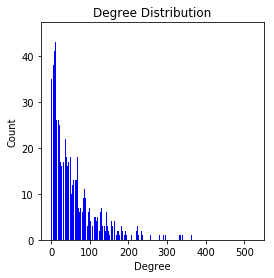

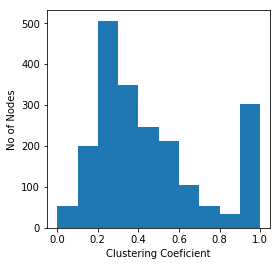

Nodes in giant cluster =  2045


NetworkXError: ignored

In [92]:
Degree_Distribution(G)
plot_clustering(G)
get_giant_cluster(G)

Name: 
Type: Graph
Number of nodes: 2060
Number of edges: 58810
Average degree:  57.0971
2060
58810
False
{86: 114.12050739957716, 150: 115.6, 41: 108.96818663838812, 71: 117.74245472837022, 73: 120.5662100456621, 64: 107.72265625, 30: 111.42, 2: 75.35526315789474, 38: 123.5216718266254, 12: 103.05833333333334, 16: 106.81681034482759, 106: 120.72641509433963, 36: 112.89153439153439, 3: 77.45370370370371, 297: 112.9023569023569, 77: 113.80389610389611, 57: 106.84345479082322, 37: 116.12039312039312, 23: 105.54919908466819, 11: 101.56871035940803, 46: 107.51521739130435, 117: 122.05982905982906, 10: 93.59130434782608, 84: 136.20634920634922, 24: 102.55637254901961, 6: 92.09649122807018, 155: 117.11612903225806, 68: 117.43300653594771, 14: 94.60164835164835, 27: 103.99305555555556, 112: 126.0625, 28: 105.58766233766234, 20: 103.85952380952381, 176: 130.08238636363637, 111: 119.6951951951952, 49: 117.8061224489796, 104: 120.76923076923077, 8: 87.93055555555556, 143: 118.89277389277389, 4: 

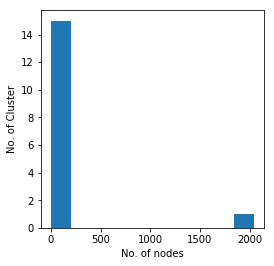

In [17]:
print(nx.info(G))
print(nx.number_of_nodes(G))
print(nx.number_of_edges(G))
print(nx.is_directed(G))
print(nx.average_degree_connectivity(G))
for C in nx.connected_component_subgraphs(G):
    print(nx.average_shortest_path_length(C))
yg=[len(c) for c in nx.connected_component_subgraphs(G)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(yg)
print(nx.average_clustering(G))

In [94]:
G_CN = G.copy()
print(nx.info(G_CN))
G_JC = G.copy()
print(nx.info(G_JC))
G_AA = G.copy()
print(nx.info(G_AA))
G_RA = G.copy()
print(nx.info(G_RA))
G_PA = G.copy()
print(nx.info(G_PA))

Name: 
Type: Graph
Number of nodes: 2060
Number of edges: 58810
Average degree:  57.0971
Name: 
Type: Graph
Number of nodes: 2060
Number of edges: 58810
Average degree:  57.0971
Name: 
Type: Graph
Number of nodes: 2060
Number of edges: 58810
Average degree:  57.0971
Name: 
Type: Graph
Number of nodes: 2060
Number of edges: 58810
Average degree:  57.0971
Name: 
Type: Graph
Number of nodes: 2060
Number of edges: 58810
Average degree:  57.0971


In [0]:
total_edges=list(G.edges())
methods=['CN','JC','AA','RA','PA','KZ','RP']
allm={m:{} for m in methods}

In [0]:

for p in total_edges:
        n1,n2=p
        ngh1 = set(G[n1])
        ngh2 = set(G[n2])
        inter = ngh1.intersection(ngh2) # ngh1 & ngh2
        inter_l = len(inter)
        union_l = len(ngh1.union(ngh2)) #ngh1 | ngh2            
        
        allm['CN'][p]=inter_l
        allm['JC'][p]=(inter_l/union_l) if union_l else 0.0
        allm['AA'][p]=sum([1/log(len(G[z])) for z in inter]) # denom cant be zero as atleast 2 edges
        allm['RA'][p]=sum([1/len(G[z]) for z in inter])
        allm['PA'][p]=len(ngh1)*len(ngh2)
        


In [0]:
Existing={}
for m in methods:
    Existing[m] = sorted([(e,allm[m][e]) for e in total_edges],key=lambda x:x[1],reverse=True)

{0: 0, 75: 42.39, 41: 44.27673545966229, 34: 44.89572192513369, 38: 43.62393887945671, 21: 43.017857142857146, 17: 43.86800573888092, 60: 42.994166666666665, 30: 43.333333333333336, 2: 35.30263157894737, 12: 45.83119658119658, 16: 46.016447368421055, 20: 43.269444444444446, 3: 39.58730158730159, 11: 46.15104895104895, 31: 43.26302729528536, 27: 45.93265993265993, 37: 45.01677539608574, 23: 43.093969144460026, 45: 42.28496732026144, 10: 42.63703703703704, 24: 44.640625, 6: 42.92176870748299, 62: 42.24486803519061, 61: 42.09205548549811, 14: 43.59126984126984, 26: 43.44230769230769, 66: 41.303030303030305, 28: 43.77626050420168, 19: 43.80952380952381, 18: 44.82567049808429, 8: 41.16326530612245, 4: 37.932291666666664, 1: 36.64102564102564, 77: 38.45454545454545, 22: 44.43766233766234, 47: 42.91489361702128, 56: 41.94805194805195, 39: 44.42773892773893, 48: 42.004629629629626, 36: 44.034946236559136, 5: 41.48571428571429, 35: 42.82222222222222, 42: 43.429453262786595, 70: 40.7, 40: 42.915

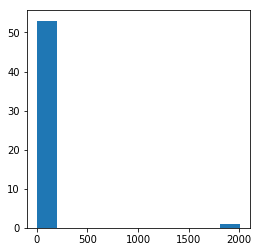

In [115]:
G_CN.remove_edges_from([i[0] for i in Existing['CN'][:30000]])
print(nx.average_degree_connectivity(G_CN))
for C in nx.connected_component_subgraphs(G_CN):
    print(nx.average_shortest_path_length(C))
x=[len(c) for c in nx.connected_component_subgraphs(G_CN)]
plt.hist(x)
print(nx.average_clustering(G_CN))

{5: 84.84878048780487, 99: 50.9057239057239, 29: 75.34084880636605, 16: 72.22786458333333, 31: 66.80337941628264, 27: 74.54700854700855, 8: 81.654296875, 51: 61.84313725490196, 20: 71.95, 33: 66.05270092226614, 2: 66.57792207792208, 12: 77.88666666666667, 7: 68.81239242685025, 18: 76.35802469135803, 36: 67.37393162393163, 9: 80.93548387096774, 135: 38.733333333333334, 21: 79.87301587301587, 22: 74.61515151515151, 15: 76.02948717948718, 65: 58.88205128205128, 0: 0, 24: 73.87760416666667, 3: 68.66190476190476, 89: 55.62546816479401, 54: 62.21399176954733, 14: 77.43239795918367, 28: 69.62142857142857, 66: 61.83901515151515, 13: 71.63338788870703, 59: 64.5542372881356, 10: 73.78387096774193, 35: 71.08831168831169, 40: 67.56029411764706, 1: 83.68627450980392, 104: 53.59134615384615, 85: 54.423529411764704, 53: 62.568396226415096, 23: 70.6123188405797, 4: 69.25714285714285, 64: 53.1953125, 77: 60.17694805194805, 42: 66.93977591036415, 6: 72.53030303030303, 48: 61.75868055555556, 58: 62.50191

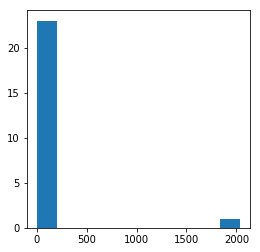

In [116]:
G_JC.remove_edges_from([i[0] for i in Existing['JC'][:30000]])
print(nx.average_degree_connectivity(G_JC))
for C in nx.connected_component_subgraphs(G_JC):
    print(nx.average_shortest_path_length(C))
y=[len(c) for c in nx.connected_component_subgraphs(G_JC)]
plt.hist(y)
print(nx.average_clustering(G_JC))

{1: 36.875, 75: 41.74, 41: 44.17627494456763, 34: 44.166666666666664, 38: 45.06666666666667, 21: 42.84632034632035, 16: 45.52743902439025, 59: 41.38898305084746, 30: 43.19555555555556, 2: 35.31578947368421, 12: 46.37103174603175, 19: 43.63029525032093, 27: 44.4537037037037, 3: 39.476190476190474, 37: 44.31220876048462, 11: 45.97585227272727, 26: 43.41268191268191, 23: 43.88801054018445, 46: 43.92892976588629, 10: 41.973076923076924, 0: 0, 24: 44.220238095238095, 6: 43.02721088435374, 64: 41.49609375, 60: 41.983333333333334, 14: 43.45378151260504, 63: 43.38239538239538, 28: 44.032051282051285, 20: 43.165151515151514, 61: 42.3103825136612, 45: 45.17671957671958, 8: 41.20663265306123, 32: 44.86764705882353, 4: 37.776041666666664, 78: 41.65384615384615, 22: 43.76781326781327, 18: 45.030651340996165, 47: 42.68821603927987, 55: 42.502479338842974, 43: 41.25678294573643, 48: 42.68353174603175, 36: 44.04124579124579, 5: 41.458536585365856, 42: 43.07142857142857, 69: 39.789855072463766, 40: 42.

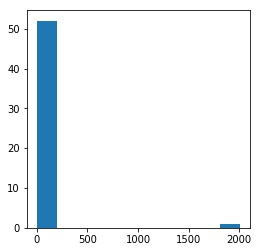

In [117]:
G_AA.remove_edges_from([i[0] for i in Existing['AA'][:30000]])
print(nx.average_degree_connectivity(G_AA))
for C in nx.connected_component_subgraphs(G_AA):
    print(nx.average_shortest_path_length(C))
ya=[len(c) for c in nx.connected_component_subgraphs(G_AA)]
plt.hist(ya)
print(nx.average_clustering(G_AA))

{30: 35.397777777777776, 49: 38.626122448979594, 37: 36.11142721669037, 36: 37.14985380116959, 47: 36.65552178318136, 38: 37.60785159620362, 48: 37.69070512820513, 29: 36.894327030033374, 2: 32.828947368421055, 12: 35.06565656565657, 16: 34.678779069767444, 34: 36.27100840336134, 33: 35.53907496012759, 3: 32.28703703703704, 44: 38.39755244755245, 23: 33.97953964194373, 11: 36.756198347107436, 40: 37.81440677966102, 41: 37.50278745644599, 10: 34.958333333333336, 15: 32.306306306306304, 22: 34.07670454545455, 6: 35.9078947368421, 45: 37.578989898989896, 14: 34.995073891625616, 25: 35.73125, 56: 33.825892857142854, 24: 36.75, 28: 34.798809523809524, 20: 33.258, 39: 37.41102181400689, 8: 35.19565217391305, 4: 32.361111111111114, 1: 30.257142857142856, 52: 37.23601398601399, 18: 35.95039682539682, 43: 37.71458773784355, 50: 36.53666666666667, 21: 33.44155844155844, 5: 33.582352941176474, 53: 36.044474393531, 19: 35.154970760233915, 42: 38.97907647907648, 32: 34.24172794117647, 31: 35.609970

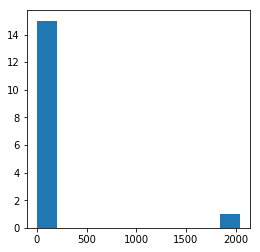

In [118]:
G_PA.remove_edges_from([i[0] for i in Existing['PA'][:30000]])
print(nx.average_degree_connectivity(G_PA))
for C in nx.connected_component_subgraphs(G_PA):
    print(nx.average_shortest_path_length(C))
yp=[len(c) for c in nx.connected_component_subgraphs(G_PA)]
plt.hist(yp)
print(nx.average_clustering(G_PA))

{18: 45.84782608695652, 77: 45.13636363636363, 37: 46.472472472472475, 15: 45.26875, 38: 44.63844393592677, 50: 45.71304347826087, 19: 45.99122807017544, 54: 46.37222222222222, 27: 45.53356481481482, 40: 44.9475, 2: 25.22222222222222, 12: 44.85795454545455, 16: 43.829787234042556, 36: 46.476190476190474, 24: 44.640277777777776, 11: 44.76069518716577, 52: 45.298878205128204, 23: 46.67577639751553, 35: 45.95274725274725, 59: 43.89642184557439, 10: 42.06666666666667, 0: 0, 6: 40.79807692307692, 65: 43.32727272727273, 3: 30.380116959064328, 14: 41.611111111111114, 53: 44.22641509433962, 20: 45.803225806451614, 51: 46.640866873065015, 22: 44.38494318181818, 8: 40.3448275862069, 1: 33.888888888888886, 89: 47.53370786516854, 21: 44.923809523809524, 49: 43.69944341372913, 9: 42.675925925925924, 46: 46.9495652173913, 33: 45.76689976689977, 62: 45.272401433691755, 48: 45.684895833333336, 39: 46.8905325443787, 42: 45.34479717813051, 5: 40.40975609756097, 45: 45.01798941798942, 61: 42.559718969555

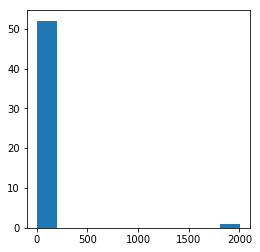

In [119]:
G_RA.remove_edges_from([i[0] for i in Existing['RA'][:30000]])
print(nx.average_degree_connectivity(G_RA))
for C in nx.connected_component_subgraphs(G_RA):
    print(nx.average_shortest_path_length(C))
yr=[len(c) for c in nx.connected_component_subgraphs(G_RA)]
plt.hist(yr)
print(nx.average_clustering(G_RA))

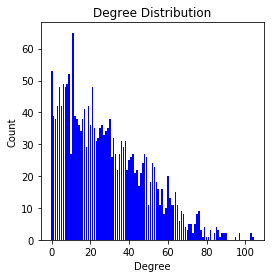

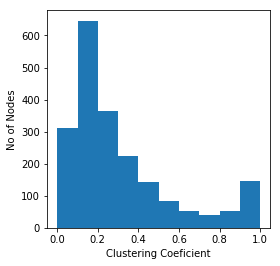

Nodes in giant cluster =  2007


NetworkXError: ignored

In [120]:
Degree_Distribution(G_CN)
plot_clustering(G_CN)
get_giant_cluster(G_CN)

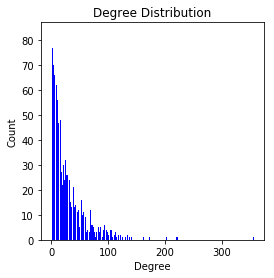

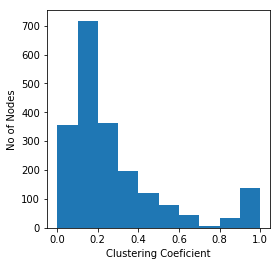

Nodes in giant cluster =  2037


NetworkXError: ignored

In [126]:
Degree_Distribution(G_JC)
plot_clustering(G_JC)
get_giant_cluster(G_JC)

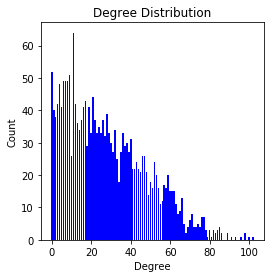

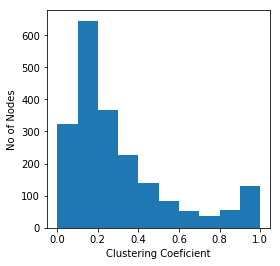

Nodes in giant cluster =  2008


NetworkXError: ignored

In [122]:
Degree_Distribution(G_AA)
plot_clustering(G_AA)
get_giant_cluster(G_AA)

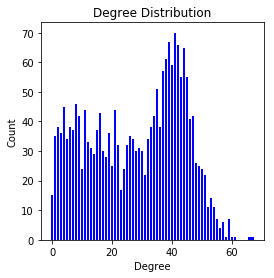

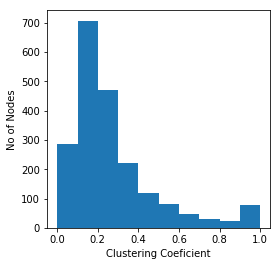

Nodes in giant cluster =  2045


NetworkXError: ignored

In [123]:
Degree_Distribution(G_PA)
plot_clustering(G_PA)
get_giant_cluster(G_PA)

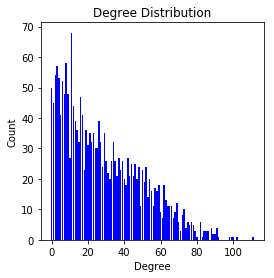

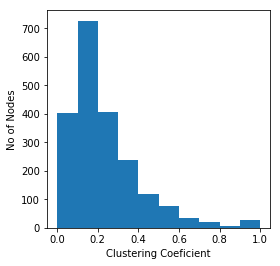

Nodes in giant cluster =  2005


NetworkXError: ignored

In [133]:
Degree_Distribution(G_RA)
plot_clustering(G_RA)
get_giant_cluster(G_RA)

In [125]:
print("Nodes in island = " , nx.number_connected_components(G))
print("Nodes in island = " , nx.number_connected_components(G_CN))
print("Nodes in island = " , nx.number_connected_components(G_JC))
print("Nodes in island = " , nx.number_connected_components(G_AA))
print("Nodes in island = " , nx.number_connected_components(G_RA))
print("Nodes in island = " , nx.number_connected_components(G_PA))


Nodes in island =  16
Nodes in island =  54
Nodes in island =  24
Nodes in island =  53
Nodes in island =  53
Nodes in island =  16


(array([23.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.0000e+00, 2.0460e+02, 4.0820e+02, 6.1180e+02, 8.1540e+02,
        1.0190e+03, 1.2226e+03, 1.4262e+03, 1.6298e+03, 1.8334e+03,
        2.0370e+03]),
 <a list of 10 Patch objects>)

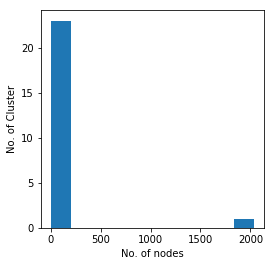

In [128]:
y=[len(c) for c in nx.connected_component_subgraphs(G_JC)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(y)

(array([52.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.0000e+00, 2.0170e+02, 4.0240e+02, 6.0310e+02, 8.0380e+02,
        1.0045e+03, 1.2052e+03, 1.4059e+03, 1.6066e+03, 1.8073e+03,
        2.0080e+03]),
 <a list of 10 Patch objects>)

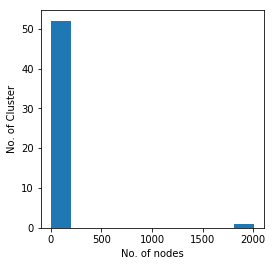

In [129]:
yg=[len(c) for c in nx.connected_component_subgraphs(G_AA)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(yg)

(array([53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.0000e+00, 2.0160e+02, 4.0220e+02, 6.0280e+02, 8.0340e+02,
        1.0040e+03, 1.2046e+03, 1.4052e+03, 1.6058e+03, 1.8064e+03,
        2.0070e+03]),
 <a list of 10 Patch objects>)

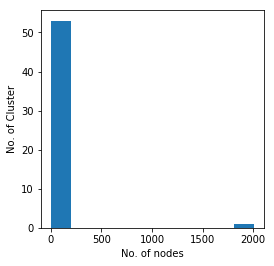

In [130]:
yg=[len(c) for c in nx.connected_component_subgraphs(G_CN)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(yg)

(array([15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.0000e+00, 2.0540e+02, 4.0980e+02, 6.1420e+02, 8.1860e+02,
        1.0230e+03, 1.2274e+03, 1.4318e+03, 1.6362e+03, 1.8406e+03,
        2.0450e+03]),
 <a list of 10 Patch objects>)

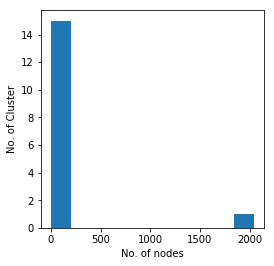

In [131]:
yg=[len(c) for c in nx.connected_component_subgraphs(G_PA)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(yg)

(array([52.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.0000e+00, 2.0140e+02, 4.0180e+02, 6.0220e+02, 8.0260e+02,
        1.0030e+03, 1.2034e+03, 1.4038e+03, 1.6042e+03, 1.8046e+03,
        2.0050e+03]),
 <a list of 10 Patch objects>)

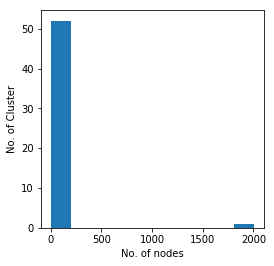

In [132]:
yg=[len(c) for c in nx.connected_component_subgraphs(G_RA)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(yg)

In [0]:


def rooted_pagerank(g, node, d = 0.85, epsilon = 1e-4):
    """ Returns rooted pagerank vector
    g graph
    node root
    d damping coefficient
    """
    ordered_nodes = sorted(g.nodes())
    root = ordered_nodes.index(node)
    adjecancy = nx.to_numpy_array(g, nodelist = ordered_nodes)
    m = np.copy(adjecancy)

    n = len(g)

    for i in range(len(g)):
        row_norm = np.linalg.norm(m[i], ord = 1)
        if row_norm != 0:
            m[i] = m[i] / row_norm

    m = m.transpose()

    rootvec = np.zeros(len(g))
    rootvec[root] = 1

    vect = np.random.rand(n)
    vect = vect / np.linalg.norm(vect, ord = 1)
    last_vect = np.ones(n) * 100 # to ensure that does not hit epsilon randomly in first step

    iterations = 0
    while np.linalg.norm(vect - last_vect, ord = 2) > epsilon:
        last_vect = vect.copy()
        vect = d * np.matmul(m, vect) + (1 - d) * rootvec
        iterations += 1

    eigenvector = vect / np.linalg.norm(vect, ord = 1)

    eigen_dict = {}
    for i in range(len(ordered_nodes)):
        eigen_dict[ordered_nodes[i]] = eigenvector[i]

    return eigen_dict

for p in total_edges:
        n1,n2=p
        aa = rooted_pagerank(G, n1)
        allm['RP'][p] = aa[n2]

In [0]:
Existing={}
Existing['RP'] = sorted([(e,allm['RP'][e]) for e in total_edges],key=lambda x:x[1],reverse=True)

In [0]:
def Degree_Distribution(GA):
    degree_sequence = sorted([d for n, d in GA.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Distribution")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show() 

def plot_clustering(GA):
  cluster = nx.clustering(GA)
  plt.hist(cluster.values())
  plt.xlabel("Clustering Coeficient")
  plt.ylabel("No of Nodes")
  plt.show()

def get_giant_cluster(GA):
  GC = max(nx.connected_component_subgraphs(GA), key=len)
  print("Nodes in giant cluster = " ,GC.number_of_nodes())
  diameter = nx.algorithms.distance_measures.diameter(GA)
  print("diameter = " , diameter)
  
G_RP = G.copy()
# top 30000 edges removed of each method and properties analysed
G_RP.remove_edges_from([i[0] for i in Existing['CN'][:30000]])
# for C in nx.connected_component_subgraphs(G_RP):
#     print(nx.average_shortest_path_length(C))
print(nx.average_clustering(G_RP))
Degree_Distribution(G_RP)
plot_clustering(G_RP)
get_giant_cluster(G_RP)
print("number of connected components = " , nx.number_connected_components(G_RP))

y=[len(c) for c in nx.connected_component_subgraphs(G_RP)]
plt.ylabel("No. of Cluster")
plt.xlabel("No. of nodes")
plt.hist(y)